In [2]:
import os
import glob

import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [ ]:
!rm -rf ./data/CelebAMask-HQ/images & rm -rf ./data/CelebAMask-HQ/masks
!mkdir ./data/CelebAMask-HQ/images & mkdir ./data/CelebAMask-HQ/masks
!cp -a ./data/CelebAMask-HQ/CelebAMask-HQ-mask-anno/*/*_hair.png ./data/CelebAMask-HQ/masks
!cp -a ./data/CelebAMask-HQ/CelebA-HQ-img/. ./data/CelebAMask-HQ/images

In [4]:
# Check folder image / masks
path_images = glob.glob("./data/CelebAMask-HQ/images/*")
path_masks = glob.glob("./data/CelebAMask-HQ/masks/*")

print(f'images: {len(path_images)}')
print(f'masks: {len(path_masks)}')

images: 30000
masks: 29300


In [5]:
for path_image in path_images:
    basename = os.path.basename(path_image)
    new_basename = '0'*(9-len(basename))+ basename
    os.rename(path_image, path_image.replace(basename, new_basename))

In [6]:
for path in path_masks:
    os.rename(path, path.replace('_hair', ''))

In [8]:
i = 0
for name in os.listdir("./data/CelebAMask-HQ/images"):
    path_mask = "./data/CelebAMask-HQ/masks/{}".format(name.replace('.jpg', ".png"))
    if not os.path.isfile(path_mask):
        os.remove("./data/CelebAMask-HQ/images/{}".format(name))
#         print(path_mask)
        i += 1
print (i)

700


In [10]:
# Check folder image / masks
path_images = glob.glob("./data/CelebAMask-HQ/images/*")
path_masks = glob.glob("./data/CelebAMask-HQ/masks/*")

print(f'images: {len(path_images)}')
print(f'masks: {len(path_masks)}')

images: 29300
masks: 29300


(1024, 1024, 3) (512, 512, 3)
[  0 255]


Text(0.5,1,'Mask')

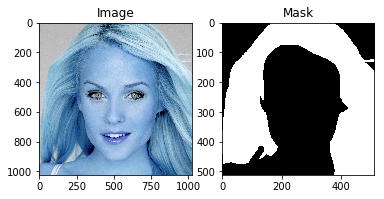

In [11]:
image = cv2.imread(path_images[0])
mask = cv2.imread(path_masks[0])
print(image.shape, mask.shape)
print(np.unique(mask))

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plt.imshow(image)
a.set_title('Image')
a = fig.add_subplot(1, 2, 2)
plt.imshow(mask)
a.set_title('Mask')